In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
IMAGE_SIZE = [224, 224]

In [4]:
train_path = 'drive/MyDrive/Dataset/Train'
valid_path = 'drive/MyDrive/Dataset/Test'

In [5]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
for layer in vgg.layers:
  layer.trainable = False

In [7]:
folders = glob('drive/MyDrive/Dataset/Train/*')

In [8]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('drive/MyDrive/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('drive/MyDrive/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 63 images belonging to 19 classes.
Found 19 images belonging to 19 classes.


In [17]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 2s 1s/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 2.2352 - val_accuracy: 0.4737
Epoch 2/50
2/2 [==============================] - 2s 1s/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 2.2225 - val_accuracy: 0.4737
Epoch 3/50
2/2 [==============================] - 2s 1s/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 2.2108 - val_accuracy: 0.4737
Epoch 4/50
2/2 [==============================] - 2s 1s/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 2.2033 - val_accuracy: 0.4737
Epoch 5/50
2/2 [==============================] - 2s 1s/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 2.1946 - val_accuracy: 0.5263
Epoch 6/50
2/2 [==============================] - 2s 1s/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 2.1857 - val_accuracy: 0.5789
Epoch 7/50
2/2 [==============================] - 2s 1s/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 2.1767 - val_accuracy: 0.5789
Epoch 8/50
2/2 [=========================

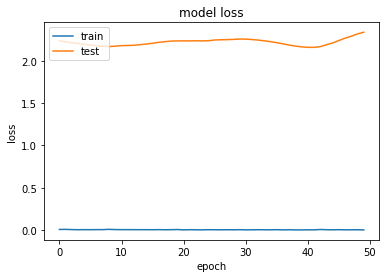

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('LossVal_loss')

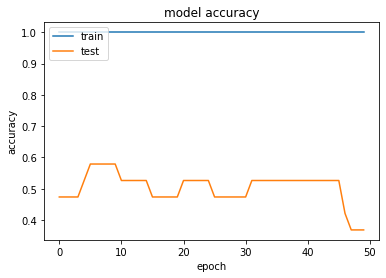

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('AccVal_acc')